# Prerequisites

## Imports

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


## Data

In [18]:

# Read all sheets from the Excel file
dfs = pd.read_excel('mousTask.xlsx', sheet_name=None)

# Access individual sheets by their name
Spend = dfs['Spend']
Sales = dfs['Sales']

# Clean data
Spend = Spend.drop(columns = ['country'])
Spend['spend'] = Spend['spend'].round(2)


In [19]:
channels1 = Spend.groupby(['channel']).sum()
channels1['conversion'] = channels1['clicks'] / channels1['impressions']
channels1['spendperclick'] = channels1['spend'] / channels1['clicks']
print(channels1)

channels = Spend.groupby(['channel','countryid']).sum()
channels['conversion'] = channels['clicks'] / channels['impressions']
channels['spendperclick'] = channels['spend'] / channels['clicks']
print(channels)


                             spend  impressions    clicks  conversion  \
channel                                                                 
Facebook/Instagram Paid  379426.41   59594221.0  701780.0    0.011776   
TikTok Paid               98708.34   22884090.0  106338.0    0.004647   
YouTube Paid             898092.99  111705042.0  488079.0    0.004369   

                         spendperclick  
channel                                 
Facebook/Instagram Paid       0.540663  
TikTok Paid                   0.928251  
YouTube Paid                  1.840057  
                                       spend  impressions    clicks  \
channel                 countryid                                     
Facebook/Instagram Paid GB         152223.12   32517037.0  360252.0   
                        NL          12763.96    3274673.0   42441.0   
                        US         214439.33   23802511.0  299087.0   
TikTok Paid             GB          43353.84   14038226.0   52186.0   
   

# Problem Question 1 - Which channel is the most beneficial advertising method

                             spend  impressions    clicks  clickperimpression
channel                                                                      
Facebook/Instagram Paid  379426.41   59594221.0  701780.0            0.011776
TikTok Paid               98708.34   22884090.0  106338.0            0.004647
YouTube Paid             898092.99  111705042.0  488079.0            0.004369


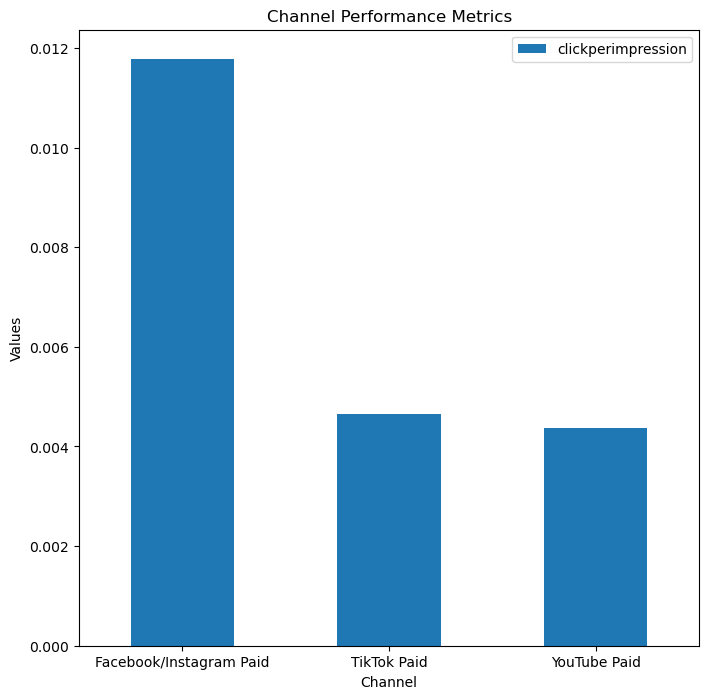

In [20]:
channels = Spend.groupby('channel').sum()
channels['clickperimpression'] = channels['clicks'] / channels['impressions']
print(channels)
channels[['clickperimpression']].plot(kind='bar', figsize=(8, 8))
plt.title('Channel Performance Metrics')
plt.ylabel('Values')
plt.xlabel('Channel')
plt.xticks(rotation=0)
plt.show()

# Problem Question 2 - Which channel is the most beneficial advertising method per country

                                       spend  impressions    clicks  \
channel                 countryid                                     
Facebook/Instagram Paid GB         152223.12   32517037.0  360252.0   
                        NL          12763.96    3274673.0   42441.0   
                        US         214439.33   23802511.0  299087.0   
TikTok Paid             GB          43353.84   14038226.0   52186.0   
                        US          55354.50    8845864.0   54152.0   
YouTube Paid            GB         245457.98   43005092.0  198120.0   
                        NL          52644.48    9887587.0   44244.0   
                        US         599990.53   58812363.0  245715.0   

                                   clickperimpression  
channel                 countryid                      
Facebook/Instagram Paid GB                   0.011079  
                        NL                   0.012960  
                        US                   0.012565  
TikTok Pa

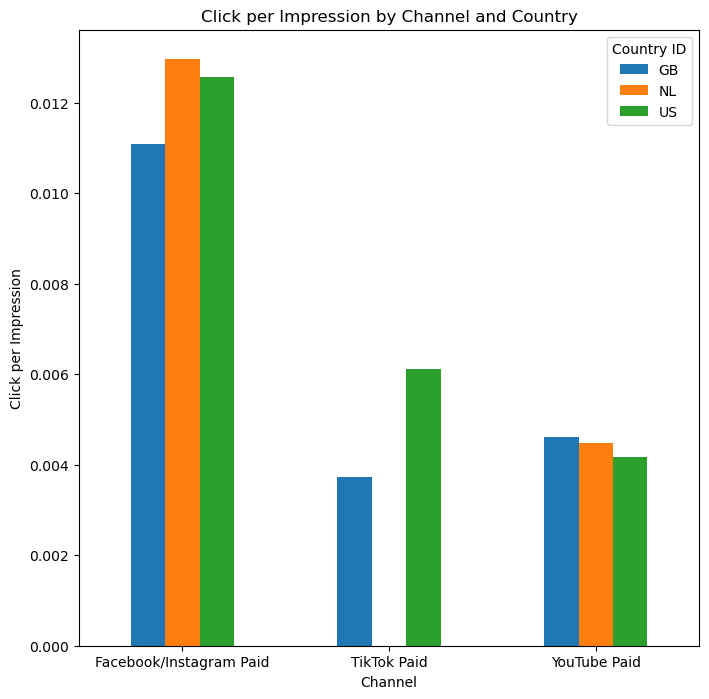

In [21]:
channels = Spend.groupby(['channel','countryid']).sum()
channels['clickperimpression'] = channels['clicks'] / channels['impressions']
print(channels)
channels['clickperimpression'].unstack().plot(kind='bar', figsize=(8, 8))
plt.title('Click per Impression by Channel and Country')
plt.ylabel('Click per Impression')
plt.xlabel('Channel')
plt.xticks(rotation=00)
plt.legend(title='Country ID')
plt.show()

# Problem Question 3 - Which channel is best for generating revenue

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Aggregate daily spend by channel:
daily_spend = Spend.groupby(['date', 'channel'])['spend'].sum().reset_index()


# 2. Pivot the spend data so that each channel becomes a separate feature.
daily_spend_pivot = daily_spend.pivot(index='date', columns='channel', values='spend').fillna(0)

# 3. Aggregate daily sales revenue from Sales data.
daily_sales = (Sales.groupby('main_date')['net_revenue']
                     .sum()
                     .reset_index()
                     .rename(columns={'main_date': 'date'}))

# 4. Merge the spend and revenue data on 'date'.
data = pd.merge(daily_spend_pivot, daily_sales, on='date', how='inner')

# Define features (spend per channel) and target (net revenue)
X = data[daily_spend_pivot.columns]  # All channel spend columns
y = data['net_revenue']

# Split the data into training and testing sets (default 75/25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set and evaluate using the R2 score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("\nR2 Score:", r2)

# Display the model coefficients for each channel and the intercept
print("\nModel Coefficients:")
for channel, coef in zip(X.columns, model.coef_):
    print(f"{channel}: {coef}")
print("Intercept:", model.intercept_)





R2 Score: 0.2526282803557973

Model Coefficients:
Facebook/Instagram Paid: 10.72504115201496
TikTok Paid: 1.4351400936482674
YouTube Paid: 1.8248083742639065
Intercept: 30042.172278632665
